### Problem 1: Understanding Backpropagation

<img src='figures/fig_1.png' width="700" height="300">

### Step 1: Forward Propagation

(1) [hand written] Write and calculate  𝑧1 ,  𝑧2 ,  ℎ1 ,  ℎ2 ,  𝑧3 ,  𝑧4 ,  𝜎1 ,  𝜎2 , and  𝐸total  of "forward" propagation.

In [ ]:
import math

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

LR = 0.9
x1 = 0.2; x2 = 0.3

w1 = 0.3; w2 = 0.25
w3 = 0.4; w4 = 0.3
w5 = 0.5; w6 = 0.4
w7 = 0.7; w8 = 0.8

True1 = 0.4; True2 = 0.6

In [2]:
z1 = w1*x1 + w2*x2
print('z1:\t {} * {} + {} * {} = {}'.format(w1, x1, w2, x2, z1))

z2 = w3*x1 + w4*x2
print('z2:\t {} * {} + {} * {} = {}'.format(w3, x1, w4, x2, z2))

h1 = sigmoid(z1)
print('h1:\t sigmoid({}) = {}'.format(z1, h1))

h2 = sigmoid(z2)
print('h2:\t sigmoid({}) = {}'.format(z2, h2))

z3 = w5*h1 + w6*h2
print('z3:\t {} * {} + {} * {} = {}'.format(w5, h1, w6, h2, z3))

z4 = w7*h1 + w8*h2
print('z4:\t {} * {} + {} * {} = {}'.format(w7, h1, w8, h2, z4))

sig1 = sigmoid(z3)
print('sig1:\t sigmoid({}) = {}'.format(z3, sig1))

sig2 = sigmoid(z4)
print('sig2:\t sigmoid({}) = {}'.format(z4, sig2))

E_total = 1/2 * (True1- sig1)**2 + 1/2 * (True2 - sig2)**2
print('E_total: {}'.format(E_total))

z1:	 0.3 * 0.2 + 0.25 * 0.3 = 0.135
z2:	 0.4 * 0.2 + 0.3 * 0.3 = 0.17
h1:	 sigmoid(0.135) = 0.5336988354329009
h2:	 sigmoid(0.17) = 0.542397940774351
z3:	 0.5 * 0.5336988354329009 + 0.4 * 0.542397940774351 = 0.4838085940261908
z4:	 0.7 * 0.5336988354329009 + 0.8 * 0.542397940774351 = 0.8075075374225114
sig1:	 sigmoid(0.4838085940261908) = 0.6186468145681012
sig2:	 sigmoid(0.8075075374225114) = 0.6915781214702564
E_total: 0.02809649092639934


<img src='figures/answer_1.jpg' width="1000" height="300">

### Step 2: BackPropagation 1

<img src='figures/fig_5.png' width="700" height="300">

(2) [hand written] update  𝜔5 ,  𝜔6 ,  𝜔7 ,  𝜔8   →   𝜔5+ ,  𝜔6+ ,  𝜔7+ ,  𝜔8+  of back-propagation.

In [3]:
dw5 = (sig1 - True1) * sig1 * (1 - sig1) * h1
w5p = w5 - 0.9*dw5
print('w5p:\t {} = {} - 0.9 * {}'.format(w5p, w5, dw5))

dw6 = (sig1 - True1) * sig1 * (1 - sig1) * h2
w6p = w6 - 0.9*dw6
print('w6p:\t {} = {} - 0.9 * {}'.format(w6p, w6, dw6))

dw7 = (sig2 - True2) * sig2 * (1 - sig2) * h1
w7p = w7 - 0.9*dw7
print('w7p:\t {} = {} - 0.9 * {}'.format(w7p, w7, dw7))

dw8 = (sig2 - True2) * sig2 * (1 - sig2) * h2
w8p = w8 - 0.9*dw8
print('w8p:\t {} = {} - 0.9 * {}'.format(w8p, w8, dw8))

w5p:	 0.47522280843466186 = 0.5 - 0.9 * 0.027530212850375706
w6p:	 0.3748189488322377 = 0.4 - 0.9 * 0.027978945741958097
w7p:	 0.6906175357369874 = 0.7 - 0.9 * 0.010424960292236172
w8p:	 0.7904646048336998 = 0.8 - 0.9 * 0.010594883518111373


<img src='figures/answer_2.jpg' width="1000" height="300">

### Step 3: BackPropagation 2

<img src='figures/fig_2.png' width="700" height="300">

(3) [hand written] update  𝜔1 ,  𝜔2 ,  𝜔3 ,  𝜔4   →   𝜔1+ ,  𝜔2+ ,  𝜔3+ ,  𝜔4+  of back-propagation.

In [4]:
dE1 = (sig1 - True1) * sig1 * (1 - sig1) * w5
dE2 = (sig2 - True2) * sig2 * (1 - sig2) * w7

dw1 = (dE1 + dE2) * (h1 * (1 - h1)) * x1
w1p = w1 - LR*dw1
print('w1p:\t {} = {} - 0.9 * {}'.format(w1p, w1, dw1))

dw2 = (dE1 + dE2) * (h1 * (1 - h1)) * x2
w2p = w2 - LR*dw2
print('w2p:\t {} = {} - 0.9 * {}'.format(w2p, w2, dw2))

dE1 = (sig1 - True1) * sig1 * (1 - sig1) * w6
dE2 = (sig2 - True2) * sig2 * (1 - sig2) * w8

dw3 = (dE1 + dE2) * (h2 * (1 - h2)) * x1
w3p = w3 - LR*dw3
print('w3p:\t {} = {} - 0.9 * {}'.format(w3p, w3, dw3))

dw4 = (dE1 + dE2) * (h2 * (1 - h2)) * x2
w4p = w4 - LR*dw4
print('w4p:\t {} = {} - 0.9 * {}'.format(w4p, w4, dw4))

w1p:	 0.29823212911010877 = 0.3 - 0.9 * 0.0019643009887679998
w2p:	 0.2473481936651632 = 0.25 - 0.9 * 0.002946451483152
w3p:	 0.3983800212963926 = 0.4 - 0.9 * 0.001799976337341603
w4p:	 0.2975700319445888 = 0.3 - 0.9 * 0.0026999645060124043


<img src='figures/answer_3.jpg' width="1000" height="300">

<img src='figures/answer_4.jpg' width="1000" height="300">

### Step 4: Check the Result for Weight Update

<img src='figures/fig_3.png' width="700" height="300">

(4) [hand written] Write and calculate  𝐸total  with the updated weights, and compare it to the previous error.

In [5]:
z1p = w1p*x1 + w2p*x2
print('z1p:\t {} * {} + {} * {} = {}'.format(w1p, x1, w2p, x2, z1p))

z2p = w3p*x1 + w4p*x2
print('z2p:\t {} * {} + {} * {} = {}'.format(w3p, x1, w4p, x2, z2p))

h1p = sigmoid(z1p)
print('h1p:\t sigmoid({}) = {}'.format(z1p, h1p))

h2p = sigmoid(z2p)
print('h2p:\t sigmoid({}) = {}'.format(z2p, h2p))

z3p = w5p*h1 + w6p*h2
print('z3p:\t {} * {} + {} * {} = {}'.format(w5p, h1p, w6p, h2p, z3p))

z4p = w7p*h1p + w8p*h2p
print('z4p:\t {} * {} + {} * {} = {}'.format(w7p, h1p, w8p, h2p, z4p))

sig1p = sigmoid(z3p)
print('sig1p:\t sigmoid({}) = {}'.format(z3p, sig1p))

sig2p = sigmoid(z4p)
print('sig2p:\t sigmoid({}) = {}'.format(z4p, sig2p))

E_totalp = 1/2 * (True1- sig1p)**2 + 1/2 * (True2 - sig2p)**2
print('E_totalp: {}'.format(E_totalp))

z1p:	 0.29823212911010877 * 0.2 + 0.2473481936651632 * 0.3 = 0.1338508839215707
z2p:	 0.3983800212963926 * 0.2 + 0.2975700319445888 * 0.3 = 0.16894701384265515
h1p:	 sigmoid(0.1338508839215707) = 0.533412850319756
h2p:	 sigmoid(0.16894701384265515) = 0.5421365754231773
z3p:	 0.47522280843466186 * 0.533412850319756 + 0.3748189488322377 * 0.5421365754231773 = 0.4569268854425441
z4p:	 0.6906175357369874 * 0.533412850319756 + 0.7904646048336998 * 0.5421365754231773 = 0.7969240420760495
sig1p:	 sigmoid(0.4569268854425441) = 0.6122848952367109
sig2p:	 sigmoid(0.7969240420760495) = 0.6893161197048738
E_totalp: 0.026521122992398338


<img src='figures/answer_5.jpg' width="1000" height="300">

In [6]:
E_totalp < E_total

True

In [ ]:
'''
updated E_total is less than E_total.
'''

### Problem 2: Multi-Layer Perceptron

You will classify 4 points into 2 classes using MLP.

Plot the given data first.

(0) Start with importing modules.

&nbsp;&nbsp;&nbsp;&nbsp;The lectures are conducted using tensorflow 1, but recently, tensorflow 2 is used a lot, so you can choose between tensorflow 1 and 2, and then solve the problems.

&nbsp;&nbsp;&nbsp;&nbsp;If you run !pip install tensorflow, then tensorflow 2 is installed. To run tensorflow 1, execute the cell below.

In [7]:
import numpy as np

# if you want to use tensorflow 1
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


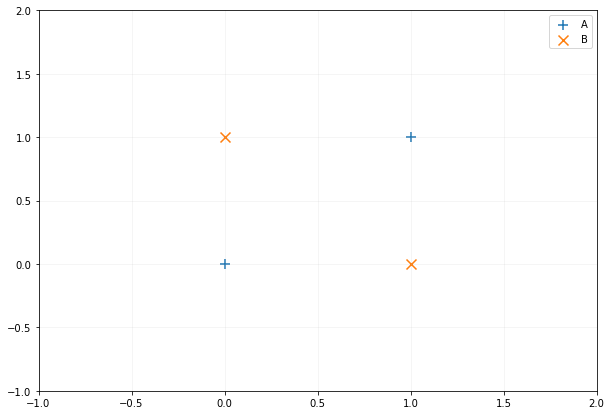

In [8]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x_data = np.array([[0, 0], [1, 1], [0, 1], [1, 0]], dtype=np.float32)
y_data = np.array([[0], [0], [1], [1]], dtype=np.float32)

plt.figure(figsize=(10, 7))
plt.scatter(x_data[:2, 0], x_data[:2, 1], marker='+', s=100, label='A')
plt.scatter(x_data[2:, 0], x_data[2:, 1], marker='x', s=100, label='B')
plt.xlim([-1, 2]); plt.ylim([-1, 2])
plt.grid(alpha=0.15); plt.legend();
plt.show()

(1) Design a perceptron model which has a single layer, and train it to show the accuracy.

In [9]:
# Tensorflow 1
tf.reset_default_graph()

In [10]:
def build_model(x, weights, biases):   
    output = tf.add(tf.matmul(x, weights['output']), biases['output'])
    return output

n_input, n_output = 2, 1
train_X, train_y = x_data, y_data

LR, n_iter, n_prt = 0.01, 20001, 2000  

weights = {'output': tf.Variable(
    tf.random_normal([n_input, n_output], stddev=1))}
biases = {'output': tf.Variable(
    tf.random_normal([n_output], stddev=1))}

x = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_output])

pred = build_model(x, weights, biases)
loss = tf.nn.sigmoid_cross_entropy_with_logits(logits=pred, labels=y) # single layer
loss = tf.reduce_mean(loss)

optm = tf.train.GradientDescentOptimizer(LR).minimize(loss)
init = tf.global_variables_initializer()

y_hat = tf.cast((tf.sigmoid(pred) > 0.5), dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(y, y_hat), dtype=tf.float32))

loss_record = []
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_iter):
        sess.run(optm, feed_dict = {x: train_X,  y: train_y})     
        if epoch % n_prt == 0:
            loss_val, acc_val = sess.run([loss, accuracy], 
                                         feed_dict={x: train_X,  y: train_y})
            loss_record.append(loss_val)
            print("iter: {}, loss: {}".format(
                epoch, loss_record[int(epoch / n_prt)]))

    print('\nAccuracy:{}\n'.format(acc_val))
    
    w_hat = sess.run(weights['output'])
    b_hat = sess.run(biases['output'])
    print('W: {}'.format(w_hat))
    print('b: {}'.format(b_hat))

iter: 0, loss: 0.7757846713066101
iter: 2000, loss: 0.6936824321746826
iter: 4000, loss: 0.6932581663131714
iter: 6000, loss: 0.6931701898574829
iter: 8000, loss: 0.6931519508361816
iter: 10000, loss: 0.6931481957435608
iter: 12000, loss: 0.6931474208831787
iter: 14000, loss: 0.6931471824645996
iter: 16000, loss: 0.6931472420692444
iter: 18000, loss: 0.6931471824645996
iter: 20000, loss: 0.6931471824645996

Accuracy:0.75

W: [[-7.645689e-05]
 [-7.623434e-05]]
b: [9.0566384e-05]


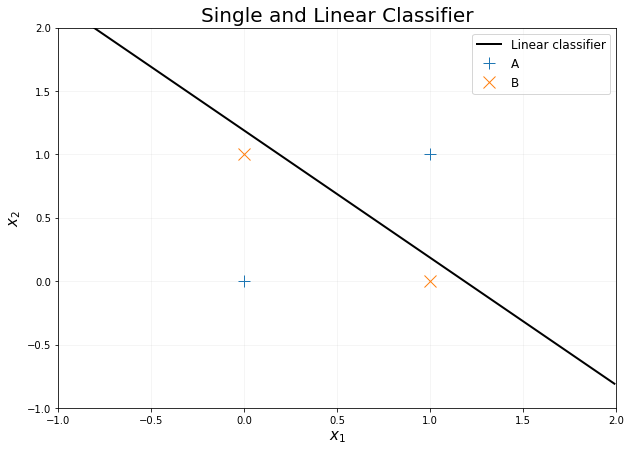

In [12]:
x1 = np.arange(-1, 2, 0.01).reshape(-1, 1)
x2 = - w_hat[0,0] / w_hat[1,0] * x1 - b_hat[0] / w_hat[1,0]

plt.figure(figsize=(10, 7))
plt.plot(x1, x2, 'black', linewidth=2, label='Linear classifier')
plt.plot(x_data [:2, 0], x_data[:2, 1], '+', label='A', markersize=12)
plt.plot(x_data[2:, 0], x_data[2:, 1], 'x', label='B', markersize=12)
plt.title('Single and Linear Classifier', size=20)
plt.xlabel('$x_1$', fontsize=15)
plt.ylabel('$x_2$', fontsize=15)
plt.xlim([-1, 2]); plt.ylim([-1, 2])
plt.grid(alpha=0.15); plt.legend(fontsize=12)
plt.show()

(3) What is the highest accuracy you can get?

Discuss about the result. Write on the below cell using ''' string '''.

You can use both Korean or English

In [ ]:
'''
For XOR problem, we can get 0.75 accuracy as the highest.
Because there is no way to seperate two dataset 
with a perceptron model which has a "single" layer.
Like the above graph, even if B data points are concentrated in one place, 
it has no choice but to include one A data point or vice versa.
'''

(4) Design a perceptron model which has 2 layers, and train it to show the accuracy.

&nbsp;&nbsp;&nbsp;&nbsp;Hidden layer: sigmoid function

In [13]:
from sklearn.preprocessing import OneHotEncoder

train_X, train_y = x_data, y_data

ohe = OneHotEncoder(handle_unknown='ignore')
train_y = ohe.fit_transform(train_y).toarray()
print(train_y)

[[1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [15]:
def build_model(x, weights, biases):
    hidden = tf.add(tf.matmul(x, weights['hidden']), biases['hidden'])
    hidden = tf.nn.sigmoid(hidden)
    
    output = tf.add(tf.matmul(hidden, weights['output']), biases['output'])  
    return output

n_input, n_hidden, n_output = 2, 2, 2
LR, n_iter, n_prt = 0.05, 20001, 1000 

weights = {'hidden': tf.Variable(tf.random_normal([n_input, n_hidden], stddev=1)),
           'output': tf.Variable(tf.random_normal([n_hidden, n_output], stddev=1))}
biases = {'hidden': tf.Variable(tf.random_normal([n_hidden], stddev=1)),
          'output': tf.Variable(tf.random_normal([n_output], stddev=1))}

x = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_output])

pred = build_model(x, weights, biases)
loss = tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y)
loss = tf.reduce_mean(loss)

optm = tf.train.GradientDescentOptimizer(LR).minimize(loss)

init = tf.global_variables_initializer()

y_hat = tf.cast((tf.sigmoid(pred) > 0.5), dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(y, y_hat), dtype=tf.float32))

loss_record = []
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_iter):
        sess.run(optm, feed_dict={x: train_X,  y: train_y})     
        if epoch % n_prt == 0:
            loss_val, acc_val = sess.run([loss, accuracy], 
                                         feed_dict={x: train_X,  y: train_y})
            loss_record.append(loss_val)
            print("iter: {}, loss: {}".format(
                epoch, loss_record[int(epoch / n_prt)]))

    print('\nAccuracy:{}\n'.format(acc_val))        

    w_hat = sess.run(weights)
    b_hat = sess.run(biases)
    print('W: {}'.format(w_hat['output']))
    print('b: {}'.format(b_hat['output']))

iter: 0, loss: 0.7530676126480103
iter: 1000, loss: 0.6857329607009888
iter: 2000, loss: 0.6456977128982544
iter: 3000, loss: 0.5833820700645447
iter: 4000, loss: 0.5387174487113953
iter: 5000, loss: 0.5020411610603333
iter: 6000, loss: 0.3265094757080078
iter: 7000, loss: 0.11642337590456009
iter: 8000, loss: 0.06001214310526848
iter: 9000, loss: 0.03928087651729584
iter: 10000, loss: 0.028906937688589096
iter: 11000, loss: 0.02275640331208706
iter: 12000, loss: 0.01871078833937645
iter: 13000, loss: 0.01585763320326805
iter: 14000, loss: 0.013742289505898952
iter: 15000, loss: 0.01211398933082819
iter: 16000, loss: 0.010823410004377365
iter: 17000, loss: 0.009776213206350803
iter: 18000, loss: 0.008910194039344788
iter: 19000, loss: 0.008182359859347343
iter: 20000, loss: 0.007562439423054457

Accuracy:1.0

W: [[-5.4623566  6.029056 ]
 [-6.0922036  5.67234  ]]
b: [ 3.5359256 -2.1779704]


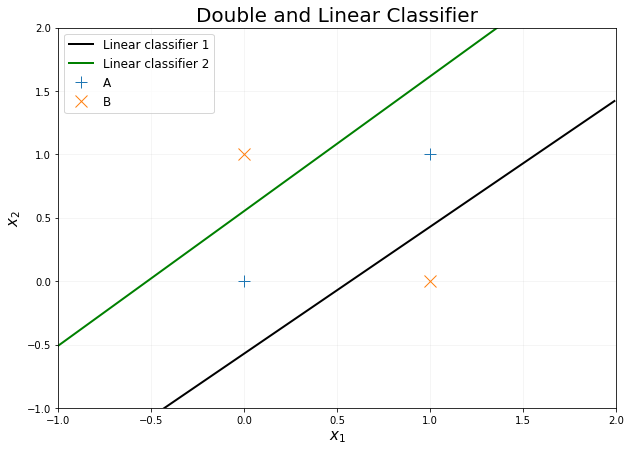

In [16]:
x1 = np.arange(-1, 2, 0.01).reshape(-1, 1)
x2 = - w_hat['hidden'][0, 0] / w_hat['hidden'][1, 0] * x1 \
     - b_hat['hidden'][0] / w_hat['hidden'][1, 0]
x3 = - w_hat['hidden'][0, 1] / w_hat['hidden'][1, 1] * x1 \
     - b_hat['hidden'][1] / w_hat['hidden'][1, 1]

plt.figure(figsize=(10, 7))
plt.plot(x1, x2, 'black', linewidth=2, label='Linear classifier 1',)
plt.plot(x1, x3, 'g', linewidth=2, label='Linear classifier 2')
plt.plot(x_data [:2, 0], x_data[:2, 1], '+', label='A', markersize=12)
plt.plot(x_data[2:, 0], x_data[2:, 1], 'x', label='B', markersize=12)
plt.title('Double and Linear Classifier', size=20)
plt.xlabel('$x_1$', fontsize=15)
plt.ylabel('$x_2$', fontsize=15)
plt.xlim([-1, 2]); plt.ylim([-1, 2])
plt.grid(alpha=0.15); plt.legend(fontsize=12)
plt.show()

### Problem 3: ANN Regression

In this problem, you are asked to use TensorFlow to implement the linear regression algorithm.

By doing this, we hope that you are getting familiar with the syntax of TensorFlow.

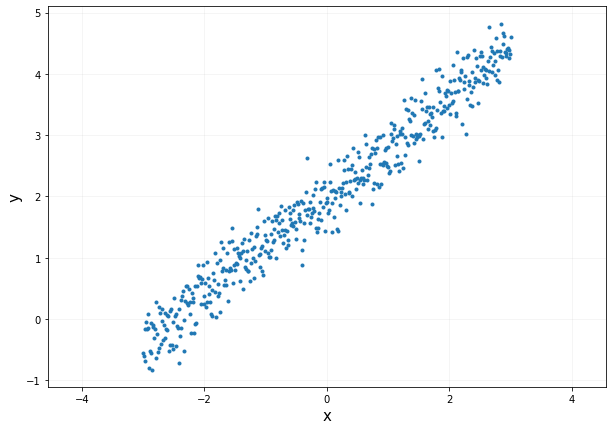

In [17]:
# Data Generation
m =  500

data_x = np.linspace(-3, 3, m)
data_y = 0.8*data_x + 2 + np.random.randn(m)*0.3
 
plt.figure(figsize = (10, 7))    
plt.plot(data_x, data_y, '.')
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.grid(alpha=0.15)
plt.axis('equal')
plt.show()

<img src='figures/fig_4.png' width="700" height="300">

(1) Define the AI model.

&nbsp;&nbsp;&nbsp;&nbsp;n_batch = 10

&nbsp;&nbsp;&nbsp;&nbsp;n_iter = 2500 (n_epoch = 250)

&nbsp;&nbsp;&nbsp;&nbsp;n_prt = 250

In [18]:
tf.reset_default_graph()

In [19]:
# we provide 'next_batch function' for your convenience (for tensorflow 1)
def next_batch(x, y, n_batch):
    m = x.shape[0]
    idx = np.random.randint(0, m, n_batch)
    x_train, y_train = x[idx].reshape(-1, 1), y[idx].reshape(-1, 1)
    
    return x_train, y_train

In [20]:
def build_model(x, weights, biases):   
    output = tf.add(tf.matmul(x, weights['output']), biases['output'])
    return output

data_x, data_y = data_x.reshape(-1, 1), data_y.reshape(-1, 1)
train_X, train_y = data_x, data_y

LR = 0.001
n_input, n_output = 1, 1
n_batch, n_iter, n_prt = 10, 2500, 250

weights = {'output': tf.Variable(
    tf.random_normal([n_input, n_output], stddev=0.1))}
biases = {'output': tf.Variable(
    tf.random_normal([n_output], stddev=0.1))}

x = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_output])

pred = build_model(x, weights, biases)
loss = tf.square(pred - y)
loss = tf.reduce_mean(loss)

optm = tf.train.GradientDescentOptimizer(LR).minimize(loss)
init = tf.global_variables_initializer()

loss_record = []
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_iter):
        train_x, train_y = next_batch(data_x, data_y, n_batch)
        sess.run(optm, feed_dict = {x: train_x,  y: train_y})     
        if epoch % n_prt == 0:
            loss_record.append(sess.run(loss, feed_dict={x: train_x,  y: train_y}))
            print("iter: {}\nCost: {}".format(
                epoch, loss_record[int(epoch / n_prt)]))
            
    w_hat = sess.run(weights)
    b_hat = sess.run(biases)

iter: 0
Cost: 5.399777412414551
iter: 250
Cost: 1.2857964038848877
iter: 500
Cost: 0.5546541810035706
iter: 750
Cost: 0.4245028495788574
iter: 1000
Cost: 0.13951516151428223
iter: 1250
Cost: 0.10255225002765656
iter: 1500
Cost: 0.07585237920284271
iter: 1750
Cost: 0.08703108131885529
iter: 2000
Cost: 0.13830775022506714
iter: 2250
Cost: 0.10350097715854645


(2) Define the weight and bias

In [21]:
# w_hat and b_hat were obtained from the above
w_val = w_hat['output'][0][0]
b_val = b_hat['output'][0]

print('w_hat: {}'.format(w_val))
print('b_hat: {}'.format(b_val))

w_hat: 0.7986181974411011
b_hat: 1.9897398948669434


(3) Plot the linear regression

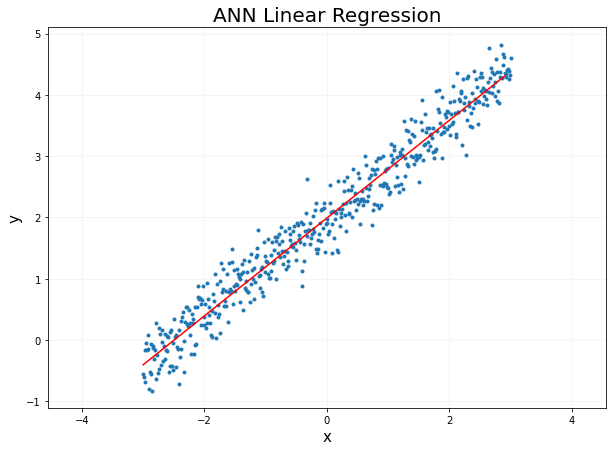

In [22]:
xp = np.arange(-3, 3, 0.1).reshape(-1, 1)
yp = w_val * xp + b_val

plt.figure(figsize = (10, 7))    
plt.plot(data_x, data_y, 'o', markersize=3)
plt.plot(xp, yp, 'r')
plt.title('ANN Linear Regression', fontsize=20)
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.grid(alpha=0.15)
plt.axis('equal')
plt.show()